# **Linear Classification I**

---

### **Introduction**
This notebook goes over the basics of linear classification.

---

### **Author**
**Junichi Koganemaru**  

---

### **References**
1. Elements of Statistical Learning by Trevor Hastie, Robert Tibshirani, and Jerome Friedman.
2. Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.
3. All of Statistics: A Concise Course in Statistical Inference by Larry Wasserman.
4. Machine Learning: A Probabilistic Perspective by Kevin P. Murphy.
---

### **Recommended Reading and Resources**

1. [Linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
2. [Quadratic discriminant analysis](https://en.wikipedia.org/wiki/Quadratic_classifier)
3. [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
4. [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
5. [K-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
6. [Generative model](https://en.wikipedia.org/wiki/Generative_model)

---

### **Last Updated**
**February 10, 2025**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Linear classification 

In linear regression models, the target variable $y$ is assumed to be continuous. In this notebook we study classification models, where the target variable is assumed to be categorical. Mathematically, we assume that $y \in \{0, 1,  2, \ldots, K\}$, where $K+1$ represents the number of classes. If $K = 1$, then the classification problem is referred to as a *binary classification* problem. If $K > 1$, then the classification problem is referred to as a *multiclass classification* problem.

### General framework

Suppose one is given data in the form of pairs $(\boldsymbol{x}_1, y_1), \ldots, (\boldsymbol{x}_n, y_n)$ where $\boldsymbol{x}_i \in \mathbb{R}^p$ (continuous features) or $\mathbb{N}^p$ (discrete features) and $y_i \in \{0, \ldots, K\}$. The goal of all classification models is to predict the class label $y$ of an observation $\boldsymbol{x}$.


*Probabilistic classifiers* are classification models that aims to predict the label of a test point $\boldsymbol{x}$ using the posterior distribution $f_{Y \mid \boldsymbol{X}}$. A common choice of a *decision rule* is to predict the class label $y$ that maximizes the posterior distribution $f_{Y \mid \boldsymbol{X}}$. In other words, we estimate the label using the MAP estimator 
$$
\hat{y} = \argmax\limits_{y \in \{0,\ldots ,K\}} f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}).
$$

There are two main types of models for estimating the posterior distribution. *Generative models* estimate the joint distribution $f_{ \boldsymbol{X} ,Y}$ and then use Bayes' theorem to estimate the posterior distribution. *Discriminative models* estimate the posterior distribution directly. 


## Linear discriminant analysis (LDA)

Suppose we have $p$ continuous features $X_1, \ldots, X_p$ and a categorical response $Y \in \{0, 1, \ldots, K\}$. We define the random vector $\boldsymbol{X} : \Omega \to \mathbb{R}^p$ via $\boldsymbol{X}(\omega) = (X_1(\omega), \ldots, X_p(\omega))$. The goal of LDA is to estimate the posterior distribution $f_{Y \mid \boldsymbol{X}}$ using the conditional distribution $f_{\boldsymbol{X} \mid Y}$.

Recall that by Bayes' theorem, the posterior distribution $f_{Y \mid \boldsymbol{X}}: \{0, \ldots , K \} \times \mathbb{R}^p \to \mathbb{R}$ is given by 
$$
f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}) = \frac{f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid y) f_Y(y)}{f_{\boldsymbol{X}}(\boldsymbol{x})} = \frac{f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid y) \mathbb{P}(Y = y)}{f_{\boldsymbol{X}}(\boldsymbol{x})} \propto f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid y) \mathbb{P}(Y = y),
$$ 
where $\propto$ denotes "proportional to". 

In LDA, we make the assumption that the conditional distribution of $\boldsymbol{X}$ given $Y = k$ is multivariate normal with mean $\boldsymbol{\mu}_k$ and covariance matrix $\Sigma$. In other words, we assume that $f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid Y = k) \sim N(\boldsymbol{\mu}_k, \Sigma)$. We also define $[0,1] \ni \pi_k = \mathbb{P}(Y = k)$. Then 
$$
\log f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}) \propto \log f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid y)  + \log \pi_k = -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu}_y)^T \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu}_y) + \log \pi_y + \log \frac{1}{\sqrt{(2\pi)^p \det \Sigma}}.
$$
We note that since the last term does not depend on $y$, we have 
$$
\hat{y} = \argmax\limits_{y \in \{0, \ldots, K\}} \log f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}) = \argmax\limits_{y \in \{0, \ldots, K\}} -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu}_y)^T \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu}_y) + \log \pi_y.
$$

Next we note that since $\Sigma$ is positive definite, its inverse is also positive definite, and in particular symmetric. Therefore 
$$
 (\boldsymbol{x} - \boldsymbol{\mu}_y)^T \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu}_y) = \boldsymbol{x}^T \Sigma^{-1} \boldsymbol{x} - 2 \boldsymbol{x}^T \Sigma^{-1} \boldsymbol{\mu}_y + \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y.
$$
We note that the first term does not depend on $y$, therefore we have 
$$
\hat{y} = \argmax\limits_{y \in \{0, \ldots, K\}} \delta_y(\boldsymbol{x}),
$$
where the *linear discriminant function* $\delta_y: \mathbb{R}^p \to \mathbb{R}$ is defined via 
$$
\delta_y(\boldsymbol{x}) = \boldsymbol{x}^T \Sigma^{-1} \boldsymbol{\mu}_y - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \log \pi_y.
$$
The linear discriminant function determines the *decision boundaries* of the classifier. For example, if $K = 1$ and $y \in \{0,1\}$, then the decision boundary is the set of points for which $\delta_0= \delta_1$. If $\delta_0(\boldsymbol{x}) < \delta_1(\boldsymbol{x})$, then we predict $y = 1$, and if $\delta_0(\boldsymbol{x}) > \delta_1(\boldsymbol{x})$, then we predict $y = 0$.

Furthermore, we note that $\delta_y$ is an *affine function* of $\boldsymbol{x}$, and therefore the decision boundary from LDA are hyperplanes. 

### MLE for the parameters

In practice, the parameters defining the Gaussian distributions are not known. Typically these are estimated from the data using an MLE approach, which leads to the following estimates:
* $\hat{\boldsymbol{\mu}}_k = \frac{1}{N_k} \sum_{i=1}^{N_k} \boldsymbol{x}_i$, where $N_k$ is the number of samples and $\boldsymbol{x}_i$ are features from class $k$.
* $\hat{\Sigma} = \frac{1}{n - K - 1} \sum_{k=0}^K \sum_{i=1}^n (\boldsymbol{x}_i - \hat{\boldsymbol{\mu}}_k)(\boldsymbol{x}_i - \hat{\boldsymbol{\mu}}_k)^T$.
* $\hat{\pi}_k = \frac{N_k}{n}$, where $n$ is the total number of samples.

We note that similar to MLE estimators for linear regression, MLE estimates for LDA can lead to models that overfit. One way to address this is to use a *shrinkage estimator* for the covariance matrix $\Sigma$:
$$
\hat{\Sigma} = \lambda \text{diag}(\hat{\Sigma}) + (1 - \lambda) \hat{\Sigma}_{\text{MLE}},
$$
where $\hat{\Sigma}_{\text{MLE}}$ is the MLE estimate and $\lambda \in [0,1]$ is a tuning parameter. This technique is known as *regularized LDA* or RDA. 

In ``scikit-learn``, the LDA classifier is implemented in the ``LinearDiscriminantAnalysis`` class. Below we give a quick demo on synthetic data.

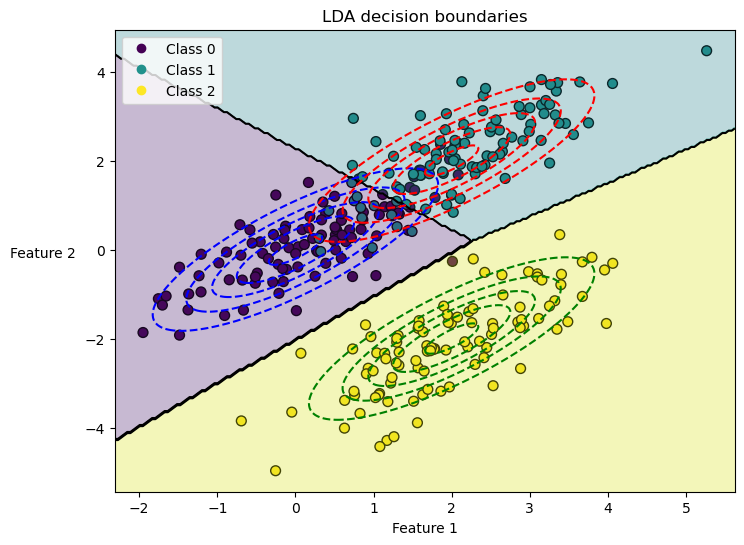

In [30]:
n_samples = 300
mean0 = [0, 0]
mean1 = [2, 2]
mean2 = [2, -2]

sigma = np.array([[1, 0.8], [0.8, 1]])

X0 = multivariate_normal(mean0, sigma).rvs(n_samples // 3)
X1 = multivariate_normal(mean1, sigma).rvs(n_samples // 3)
X2 = multivariate_normal(mean2, sigma).rvs(n_samples // 3)

X = np.vstack((X0, X1, X2))
y = np.array([0] * (n_samples // 3) + [1] * (n_samples // 3) + [2] * (n_samples // 3))

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5], linestyles=['-'])
plt.title('LDA decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 0', 'Class 1', 'Class 2'])

rv0 = multivariate_normal(mean=mean0, cov=sigma)
rv1 = multivariate_normal(mean=mean1, cov=sigma)
rv2 = multivariate_normal(mean=mean2, cov=sigma)
zz0 = rv0.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz1 = rv1.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz2 = rv2.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contour(xx, yy, zz0, levels=5, colors='blue', linestyles='--')
plt.contour(xx, yy, zz1, levels=5, colors='red', linestyles='--')
plt.contour(xx, yy, zz2, levels=5, colors='green', linestyles='--')

plt.show()


We note that LDA makes the explicit assumption that the distribution are all Gaussian with a **shared** covariance matrix. This assumption is often violated in practice, and in such cases, LDA may not perform well.

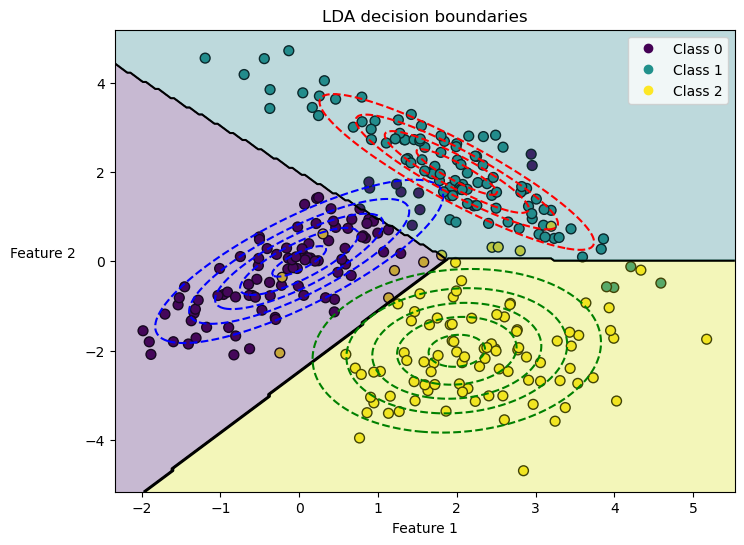

In [31]:
n_samples = 300
mean0 = [0, 0]
mean1 = [2, 2]
mean2 = [2, -2]

sigma0 = np.array([[1, 0.8], [0.8, 1]])
sigma1 = np.array([[1, -0.9], [-0.9, 1]])
sigma2 = np.array([[1, 0.1], [0.1, 1]])

X0 = multivariate_normal(mean0, sigma0).rvs(n_samples // 3)
X1 = multivariate_normal(mean1, sigma1).rvs(n_samples // 3)
X2 = multivariate_normal(mean2, sigma2).rvs(n_samples // 3)

X = np.vstack((X0, X1, X2))
y = np.array([0] * (n_samples // 3) + [1] * (n_samples // 3) + [2] * (n_samples // 3))

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5], linestyles=['-'])
plt.title('LDA decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 0', 'Class 1', 'Class 2'])

rv0 = multivariate_normal(mean=mean0, cov=sigma0)
rv1 = multivariate_normal(mean=mean1, cov=sigma1)
rv2 = multivariate_normal(mean=mean2, cov=sigma2)
zz0 = rv0.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz1 = rv1.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz2 = rv2.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contour(xx, yy, zz0, levels=5, colors='blue', linestyles='--')
plt.contour(xx, yy, zz1, levels=5, colors='red', linestyles='--')
plt.contour(xx, yy, zz2, levels=5, colors='green', linestyles='--')

plt.show()


## Quadratic discriminant analysis (QDA)

In quadratic discriminant analysis (QDA), one drops the assumptions that the covariance matrix is shared among the classes. In other words, we assume that $f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid Y = k) \sim N(\boldsymbol{\mu}_k, \Sigma_k)$, where $\Sigma_k$ is the covariance matrix of the distribution of $\boldsymbol{X}$ given $Y = k$. 

We can repeat the exact sample calculation as above, with the exception the terms involving $\Sigma_y$ cannot cannot be dropped anymore as there is dependence on the value of $y$. Therefore the *quadratic discriminant function* is given by
$$
\delta_y(\boldsymbol{x}) = \delta_{y,LDA}(\boldsymbol{x}) - \frac{1}{2} \log \det \Sigma_y + \frac{1}{2} \boldsymbol{x}^T \Sigma_y^{-1} \boldsymbol{x}.
$$
Note that the last term is quadratic in $\boldsymbol{x}$, and therefore the decision boundaries from QDA are *quadratic*.


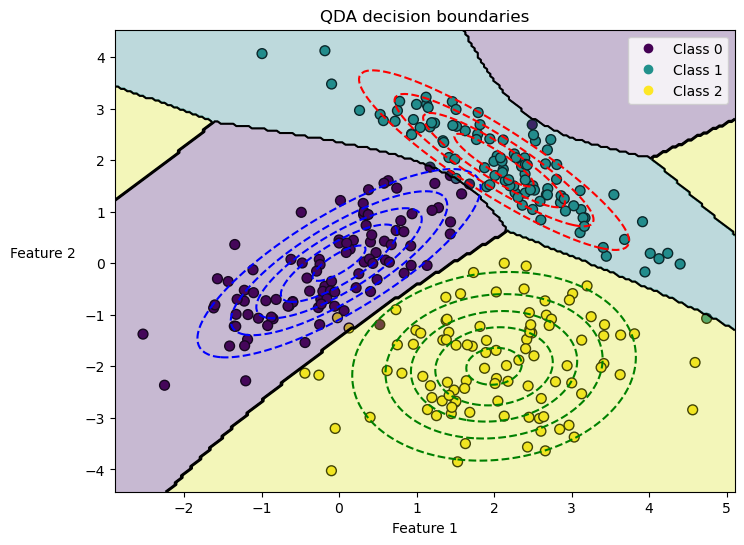

In [34]:
n_samples = 300
mean0 = [0, 0]
mean1 = [2, 2]
mean2 = [2, -2]

sigma0 = np.array([[1, 0.8], [0.8, 1]])
sigma1 = np.array([[1, -0.9], [-0.9, 1]])
sigma2 = np.array([[1, 0.1], [0.1, 1]])

X0 = multivariate_normal(mean0, sigma0).rvs(n_samples // 3)
X1 = multivariate_normal(mean1, sigma1).rvs(n_samples // 3)
X2 = multivariate_normal(mean2, sigma2).rvs(n_samples // 3)

X = np.vstack((X0, X1, X2))
y = np.array([0] * (n_samples // 3) + [1] * (n_samples // 3) + [2] * (n_samples // 3))

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5], linestyles=['-'])
plt.title('QDA decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 0', 'Class 1', 'Class 2'])

rv0 = multivariate_normal(mean=mean0, cov=sigma0)
rv1 = multivariate_normal(mean=mean1, cov=sigma1)
rv2 = multivariate_normal(mean=mean2, cov=sigma2)
zz0 = rv0.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz1 = rv1.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
zz2 = rv2.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contour(xx, yy, zz0, levels=5, colors='blue', linestyles='--')
plt.contour(xx, yy, zz1, levels=5, colors='red', linestyles='--')
plt.contour(xx, yy, zz2, levels=5, colors='green', linestyles='--')

plt.show()


## Computations for LDA and QDA

The computations that are used in computing the decision boundaries can be simplified by using the diagonalization of the covariance matrix $\Sigma_k$. If $\Sigma_k = Q_k \Lambda_k Q_k^T$ is an eigen-decomposition of $\Sigma_k$, then we can write
$$
(\boldsymbol{x} - \boldsymbol{\mu}_k)^T \Sigma_k^{-1} (\boldsymbol{x} - \boldsymbol{\mu}_k) = (\boldsymbol{z} - \boldsymbol{z}_k)^T \Lambda_k^{-1} (\boldsymbol{z} - \boldsymbol{z}_k) = \sum_{j=1}^p \frac{(z_j - z_{j,k})^2}{\lambda_{j,k}},
$$
where $\boldsymbol{z} = Q_k^T \boldsymbol{x}$. Furthermore, we also have $\log \det \Sigma_k = \sum_{j=1}^p \log \lambda_{j,k}$.

In light of these calculations, for LDA the decision boundaries can be computed more efficiently by first *sphering the data*. For LDA, we compute the sample mean $\hat{\boldsymbol{\mu}}_k$ and the sample covariance matrix $\hat{\Sigma}$, and then compute the eigen-decomposition $\hat{\Sigma} = Q \Lambda Q^T$. We then compute the transformed data $\boldsymbol{z}_i = \Lambda^{-1/2} Q^T \boldsymbol{x}_i$. The main point is that with the transformed data, the covariance matrix is the identity matrix, so the decision boundaries can be computed more efficiently.

This also leads to the idea of *reduced-rank LDA*, where one only uses the first $r$ eigenvectors of the covariance matrix. This can be useful when the data is high-dimensional and the sample covariance matrix is ill-conditioned, meaning that the sample covariance matrix is close to being singular.

For more details, see the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html) in ``scikit-learn``, and also Chapter 4.3 in Elements of Statistical Learning.

## Naive Bayes classifier

In LDA and QDA, we make the assumption that the conditional distribution of $\boldsymbol{X}$ given $Y = k$ is multivariate normal. In the naive Bayes classifier, we drop the normality assumption and instead assume that the features are conditionally independent given the class labels. 

Under the naive Bayes assumption, the posterior distribution is given by
$$
f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}) \propto f_{\boldsymbol{X} \mid Y}(\boldsymbol{x} \mid y) \mathbb{P}(Y = y) = \prod_{j=1}^p f_{X_j \mid Y}(x_j \mid y) \mathbb{P}(Y = y).
$$
Taking the log of the posterior distribution, we have
$$
\log f_{Y \mid \boldsymbol{X}}(y \mid \boldsymbol{x}) \propto \sum_{j=1}^p \log f_{X_j \mid Y}(x_j \mid y) + \log \mathbb{P}(Y = y).
$$

One can then calculate the decision boundaries as before by specifying the conditional densities $f_{X_j \mid Y}(x_j \mid y)$. Some possibilities are:

* If $X_j$'s are all continuous, then one can assume that $X_j \mid Y = y \sim N(\mu_{y,j}, \sigma_{y,j}^2)$. This leads to the *Gaussian Naive Bayes* model. Note that the covariance matrices associated for the conditional distributions of $\boldsymbol{X}$ in this setting are all diagonal, whereas in LDA and QDA this is not necessarily the case.
* If $X_j$'s are all binary, then one can assume that $X_j \mid Y = y \sim \text{Bernoulli}(\theta_{y,j})$. This leads to the *multivariate Bernoulli Naive Bayes* model.
* If $X_j$'s are categorical, then one can assume that $X_j \mid Y = y \sim \text{Multinomial}(\boldsymbol{\theta}_{y,j})$.

One can also consider cases where the features are mixed, or use different distribution assumptions. Once the distributions are specified, one can estimate the parameters using MLE, and then use the decision rule to classify new data points.

In ``sci-kit learn``, the Naive Bayes classifier is implemented in the ``naive_bayes`` module. In particular, Gaussian Naive Bayes is implemented in the ``GaussianNB`` class, and Bernoulli Naive Bayes is implemented in the ``BernoulliNB`` class. For more details, see the [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html).

Below we give a demo using the Iris dataset.

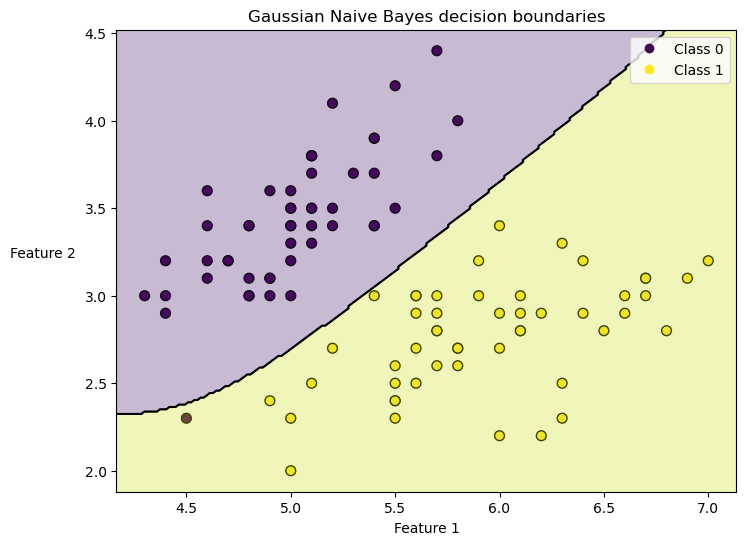

In [49]:
iris = load_iris()
X = iris.data[iris.target != 2, :2] 
y = iris.target[iris.target != 2]

gnb = GaussianNB()
gnb.fit(X, y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])
plt.title('Gaussian Naive Bayes decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 0', 'Class 1'])

plt.show()

## Logistic regression

So far, we have only looked at *geneartive models*. Next we consider an example of a *discriminative model*, where we model the conditional distribution $f_{Y \mid \boldsymbol{X}}$ directly as a function of $\boldsymbol{X}$.

### Binary classification

We first consider the case when $K = 1$, i.e. $Y \in \{0,1\}$. In logistic regression models, one use the *logstic function* to model the probability that $Y$ falls into a given class given the data. We assume directly that
$$
f_{Y \mid \boldsymbol{x}}(1 \mid \boldsymbol{x}) = \mathbb{P}(Y = 1 \mid \boldsymbol{x}) = \frac{e^{\beta_0 + \beta_0 x_1 + \ldots + \beta_p x_p}}{1 + e^{\beta_0 + \beta_0 x_1 + \ldots + \beta_p x_p}}, \; \mathbb{P}(Y = 0 \mid \boldsymbol{x}) = 1 - \mathbb{P}(Y = 1 \mid \boldsymbol{x}).
$$
The logistic function is used as its range is $[0,1]$, which can be interpreted as as probabilities. Next we define the function $p: \mathbb{R}^p \to [0, 1]$ by $p(\boldsymbol{x}) = \mathbb{P}(Y = 1 \mid x)$. Then, we note that
$$
\frac{p(\boldsymbol{x})}{1 - p(\boldsymbol{x})} = e^{\beta_0 + \beta_1 x_1 + \ldots \beta_p x_p} \implies \log\left(\frac{p(\boldsymbol{x})}{1 - p(\boldsymbol{x})}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.
$$
The decision boundary is typically defined as the set of points for which $p = 0.5$ If $p(\boldsymbol{x}) \ge 0.5$, then we predict $Y = 1$, and if $p(\boldsymbol{x}) < 0.5$, then we predict $Y = 0$.

The quantity $\frac{p}{1-p}$ is called the *odds*, and the quantity $\log\left(\frac{p}{1-p}\right)$ is called the *log-odds* or *logit*. Logistic regression essentially models the log-odds as a linear function of the features. To fit the parameters, one typically uses maximum likelihood estimation.

We note that if $p(\boldsymbol{x}) = c$, then $ \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p= \log\left(\frac{c}{1-c}\right)$. Therefore the decision boundary from logistic regression is also a hyperplane.

In [4]:
iris = load_iris()

X = iris.data[iris.target != 2, :1]  
y = iris.target[iris.target != 2]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

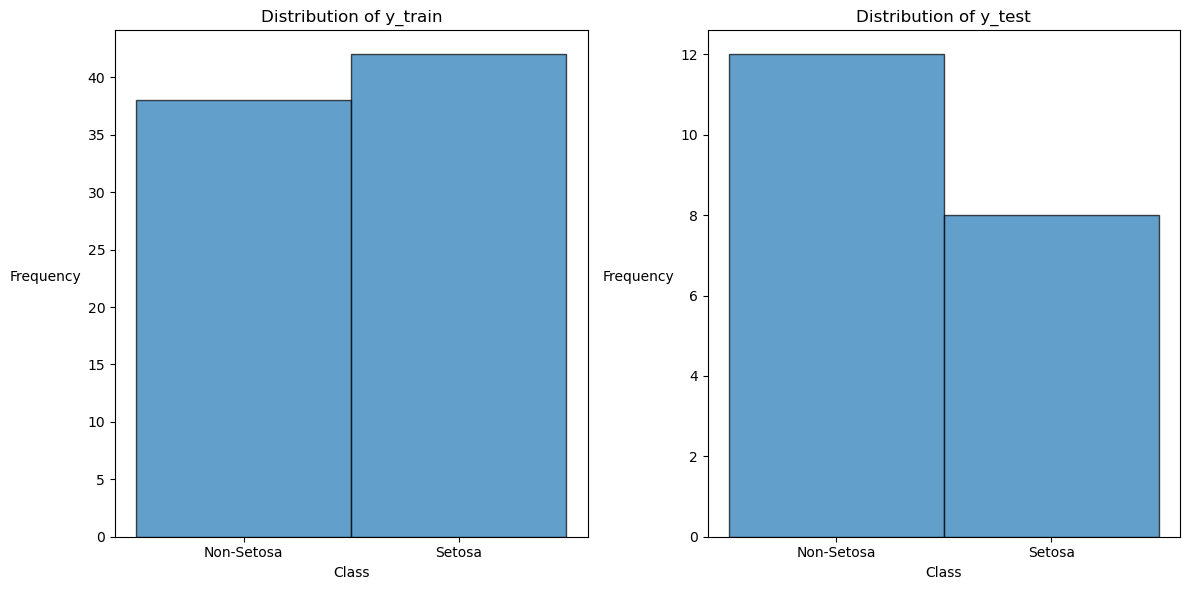

In [184]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, edgecolor='k', alpha=0.7)
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Frequency', rotation=0, labelpad=30)
plt.xticks([0.25, 0.75], ['Non-Setosa', 'Setosa'])

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=2, edgecolor='k', alpha=0.7)
plt.title('Distribution of y_test')
plt.xlabel('Class')
plt.ylabel('Frequency', rotation=0, labelpad=30)
plt.xticks([0.25, 0.75], ['Non-Setosa', 'Setosa'])

plt.tight_layout()
plt.show()

Accuracy on test data: 0.80


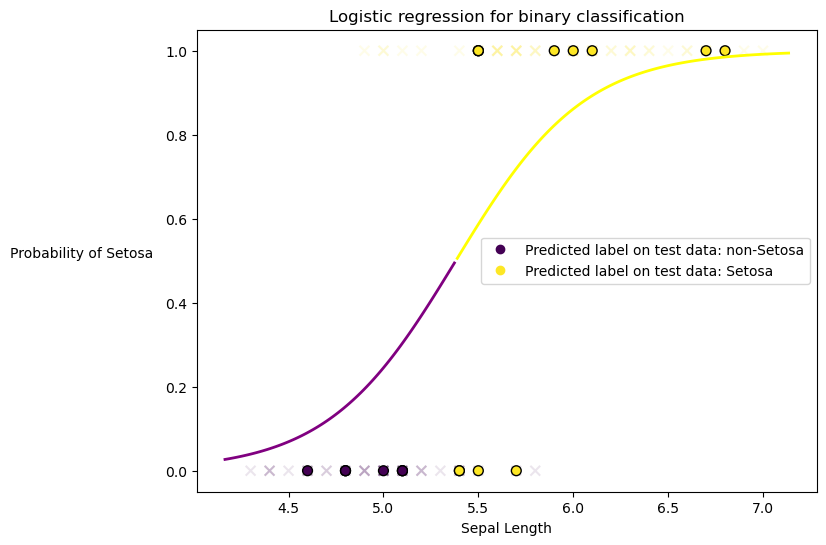

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train, y_train, c=y_train, cmap='viridis', alpha=0.1, s=50, label='Training data', marker='x')
scatter = plt.scatter(X_test, y_test, c=y_pred, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()

x_values = np.linspace(xlim[0], xlim[1], 200).reshape(-1, 1)
y_values = log_reg.predict_proba(x_values)[:, 1]

plt.plot(x_values[y_values >= 0.5], y_values[y_values >= 0.5], color='yellow', linewidth=2, label='y_values >= 0.5')
plt.plot(x_values[y_values < 0.5], y_values[y_values < 0.5], color='purple', linewidth=2, label='y_values < 0.5')

plt.legend()
plt.title('Logistic regression for binary classification')
plt.xlabel('Sepal Length')
plt.ylabel('Probability of Setosa', rotation=0, labelpad=60)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Predicted label on test data: non-Setosa', 'Predicted label on test data: Setosa'], loc='center right')

plt.show()

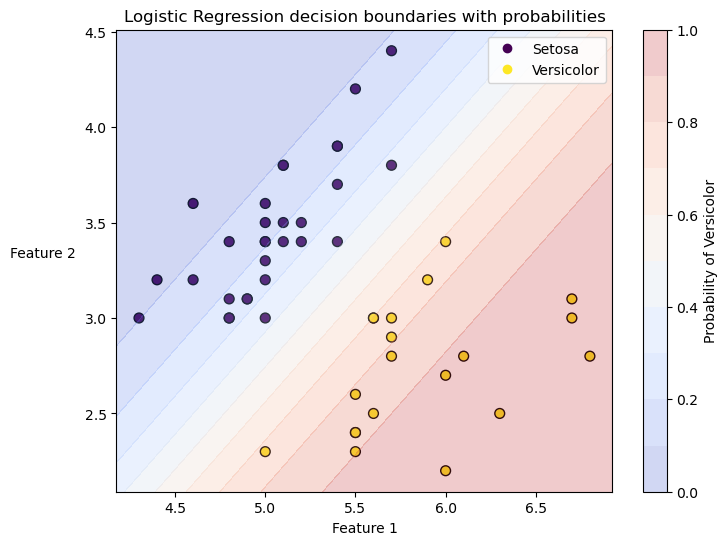

In [3]:
iris = load_iris()
X = iris.data[iris.target != 2, :2] 
y = iris.target[iris.target != 2] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_prob = log_reg.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

contour = plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm', levels=np.linspace(0, 1, 11))

plt.colorbar(contour, label='Probability of Versicolor')
plt.title('Logistic Regression decision boundaries with probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Setosa', 'Versicolor'])
plt.show()

### Multiclass classification and softmax

In the multiclass case, we assume that $Y \in \{0, \ldots, m\}$ for $m > 1$. In this setting, one first chooses a *reference class* $K$, and we assume that for each class $k \neq K$,
$$
\mathbb{P}(Y = k \mid \boldsymbol{x}) = \frac{e^{\beta_{k,0} + \beta_{k,1} x_1 + \ldots + \beta_{k,p} x_p}}{1 + \sum_{j=1}^m e^{\beta_{j,0} + \beta_{j,1} x_1 + \ldots + \beta_{j,p} x_p}},
$$
and 
$$
\mathbb{P}(Y = K \mid \boldsymbol{x}) = \frac{1}{1 + \sum_{j=1}^m e^{\beta_{j,0} + \beta_{j,1} x_1 + \ldots + \beta_{j,p} x_p}}.
$$
Then it follows that 
$$
\log\left(\frac{\mathbb{P}(Y = k \mid \boldsymbol{x})}{\mathbb{P}(Y = K \mid \boldsymbol{x})}\right) = \beta_{k,0} + \beta_{k,1} x_1 + \ldots + \beta_{k,p} x_p.
$$
This shows that the log odds between any class against the reference class is a linear function of the features, which is analogous to the binary case. It turns out that the parameters are independent of the choice of reference class, so the choice is arbitrary.

An alternative formulation that emphasizes this feature is to use the *softmax* function. In this setting, we model 
$$
\mathbb{P}(Y = k \mid \boldsymbol{x}) = \frac{e^{\beta_{k,0} + \beta_{k,1} x_1 + \ldots + \beta_{k,p} x_p}}{\sum_{j=1}^m e^{\beta_{j,0} + \beta_{j,1} x_1 + \ldots + \beta_{j,p} x_p}},
$$
and it follows that 
$$
\log\left(\frac{\mathbb{P}(Y = k_1 \mid \boldsymbol{x})}{\mathbb{P}(Y = k_2 \mid \boldsymbol{x})}\right) = (\beta_{k_1,0} - \beta_{k_2,0}) + (\beta_{k_1,1} - \beta_{k_2,1}) x_1 + \ldots + (\beta_{k_1,p} - \beta_{k_2,p}) x_p.
$$
The softmax function $\sigma: \mathbb{R}^{m+1} \to [0,1]^{m+1}$ is defined via
$$
(\sigma(\boldsymbol{z}))_k = \frac{e^{z_k}}{\sum_{j=1}^m e^{z_j}}, \; k = 0, \ldots, m.
$$
So in terms of the softmax function, we can write
$$
\mathbb{P}(Y = k \mid \boldsymbol{x}) = (\sigma(\boldsymbol{\beta}_k^T \boldsymbol{x}))_k, \; k = 0, \ldots, m.
$$
Note that from this formulation it is easy to see that $\sum_{k=0}^m \mathbb{P}(Y = k \mid \boldsymbol{x}) = 1$. The prediction label is then given by $\hat{y} = \argmax\limits_{k \in \{1, \ldots, m\}} \mathbb{P}(Y = k \mid \boldsymbol{x})$.

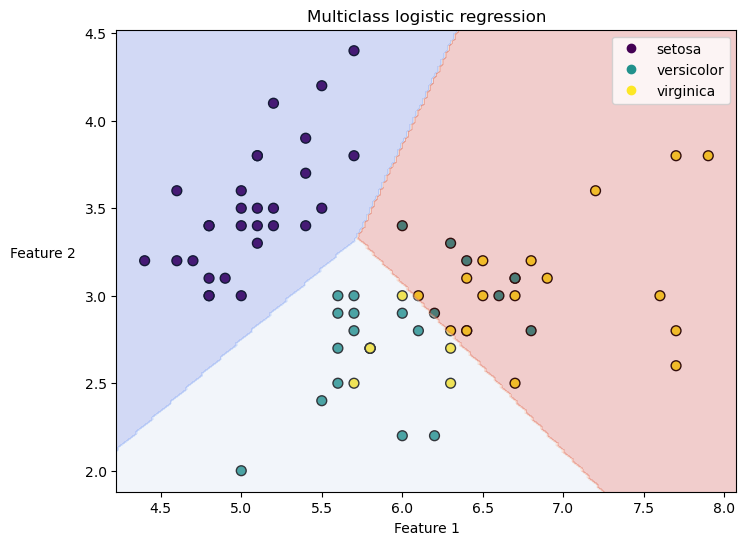

In [18]:
iris = load_iris()
X = iris.data[:, :2]  # Using the first two features for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

y_prob = log_reg.predict_proba(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour = plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')

plt.title('Multiclass logistic regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, iris.target_names)
plt.show()

## kNN classifier

The last classifier we will consider is the k-nearest neighbors classifier, which is a *non-parametric* classifier. The idea is simple: to classify a new data point, we find the $k$ nearest neighbors according to some specified distance function in the training set, and then assign the majority class label to the new data point. 

Below is a toy diagram describing the method for $k=3$.

<p align="center">
    <img src="diagrams/knn.png" alt="kNN Diagram" width="25%">
</p>

If a point is equidistant from multiple classes, then there are multiple ways to break the tie. The simplest is to assign the class label randomly. Alternatively, one can add a *weighting* to the votes, where the weight is inversely proportional to the distance from the new data point.

Accuracy on test data: 0.76


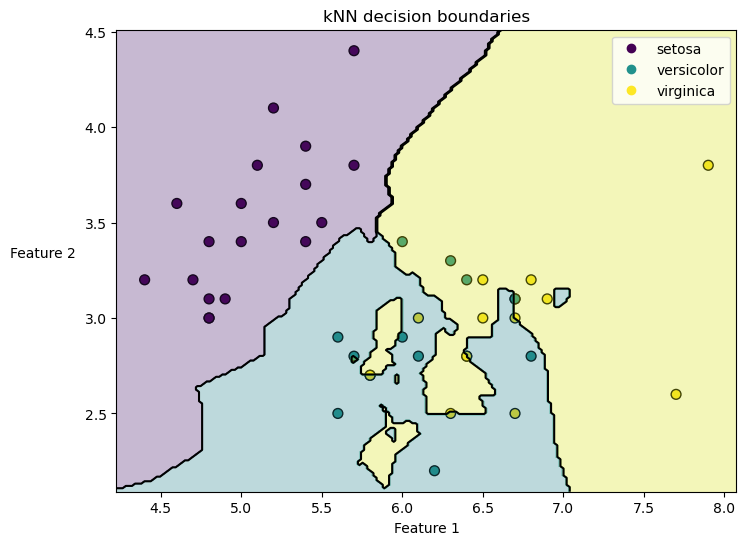

In [19]:
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5, 2.5], linestyles=['-'])
plt.title('kNN decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, iris.target_names)
plt.show()

Note that in this model, $k$ is a hyperparameter chosen by the user. There is no universal rule for choosing $k$, one way to choose $k$ is to plot the error rate as a function of $k$ and choose the value of $k$ that minimizes the error rate.

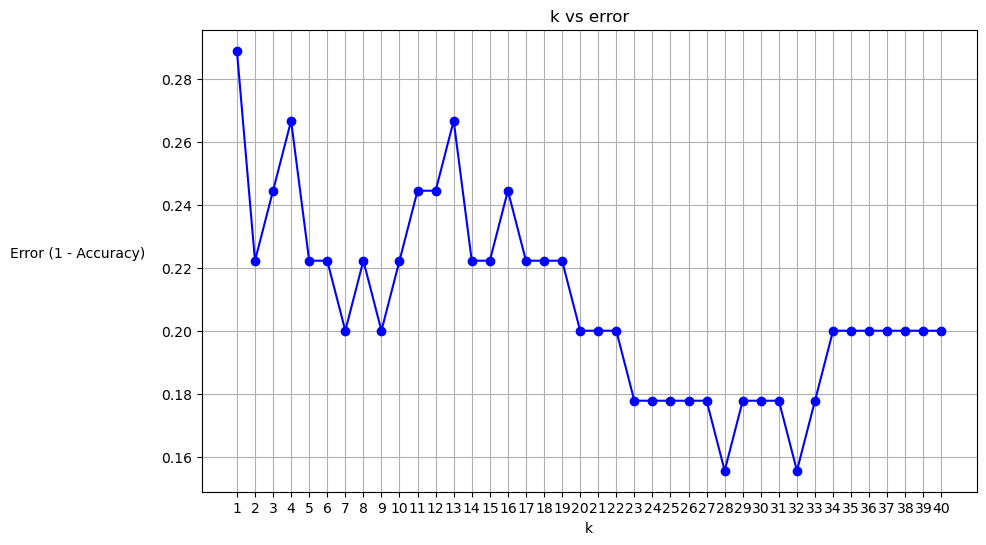

In [11]:
k_values = range(1, 41)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title('k vs error')
plt.xlabel('k')
plt.ylabel('Error (1 - Accuracy)', rotation=0, labelpad=60)
plt.xticks(k_values)
plt.grid(True)
plt.show()

Accuracy on test data: 0.84


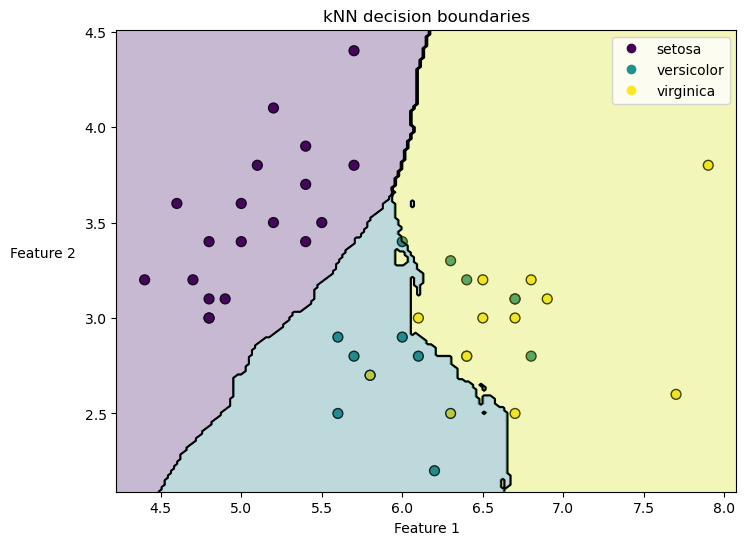

In [14]:
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = 28
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', levels=[0.5, 1.5, 2.5], linestyles=['-'])
plt.title('kNN decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2', rotation=0, labelpad=30)

handles, labels = scatter.legend_elements()
plt.legend(handles, iris.target_names)
plt.show()

For a more robust selection of $k$, one should use cross-validation. 